<a href="https://colab.research.google.com/github/noahbean33/PINN_experiments/blob/main/heat_diffusion_data_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Parameters
alpha = 2.3e-5  # Thermal diffusivity in m^2/s
dx = dy = 0.01  # Grid spacing in meters (1 cm)
dt = 0.1  # Time step in seconds, chosen to satisfy the stability condition

# Grid dimensions
nx, ny = 100, 100

# Initialize temperature grid
T = np.full((nx, ny), 70.0)  # Ambient temperature in Fahrenheit
T[nx//2, ny//2] = 200.0  # Initial temperature at the center

# Convert time duration to seconds
time_duration = 5 * 60  # 5 minutes in seconds
n_steps = int(time_duration / dt)

# Function to apply the heat equation
def apply_heat_equation(T, alpha, dx, dy, dt):
    T_new = T.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            T_new[i, j] = T[i, j] + alpha * dt * (
                (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx**2 +
                (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dy**2
            )
    return T_new

# Simulate heat diffusion
temperature_data = np.zeros((n_steps, nx, ny))

for step in range(n_steps):
    T = apply_heat_equation(T, alpha, dx, dy, dt)
    temperature_data[step] = T

# Save the data to a numpy file
np.save('temperature_data.npy', temperature_data)

# Load the data to verify
loaded_data = np.load('temperature_data.npy')
print("Data shape:", loaded_data.shape)
print("Initial temperature distribution:\n", loaded_data[0])
print("Final temperature distribution after 5 minutes:\n", loaded_data[-1])


Data shape: (3000, 100, 100)
Initial temperature distribution:
 [[70. 70. 70. ... 70. 70. 70.]
 [70. 70. 70. ... 70. 70. 70.]
 [70. 70. 70. ... 70. 70. 70.]
 ...
 [70. 70. 70. ... 70. 70. 70.]
 [70. 70. 70. ... 70. 70. 70.]
 [70. 70. 70. ... 70. 70. 70.]]
Final temperature distribution after 5 minutes:
 [[70.         70.         70.         ... 70.         70.
  70.        ]
 [70.         70.         70.         ... 70.         70.
  70.        ]
 [70.         70.         70.00000001 ... 70.00000001 70.
  70.        ]
 ...
 [70.         70.         70.00000001 ... 70.00000001 70.
  70.        ]
 [70.         70.         70.         ... 70.         70.
  70.        ]
 [70.         70.         70.         ... 70.         70.
  70.        ]]


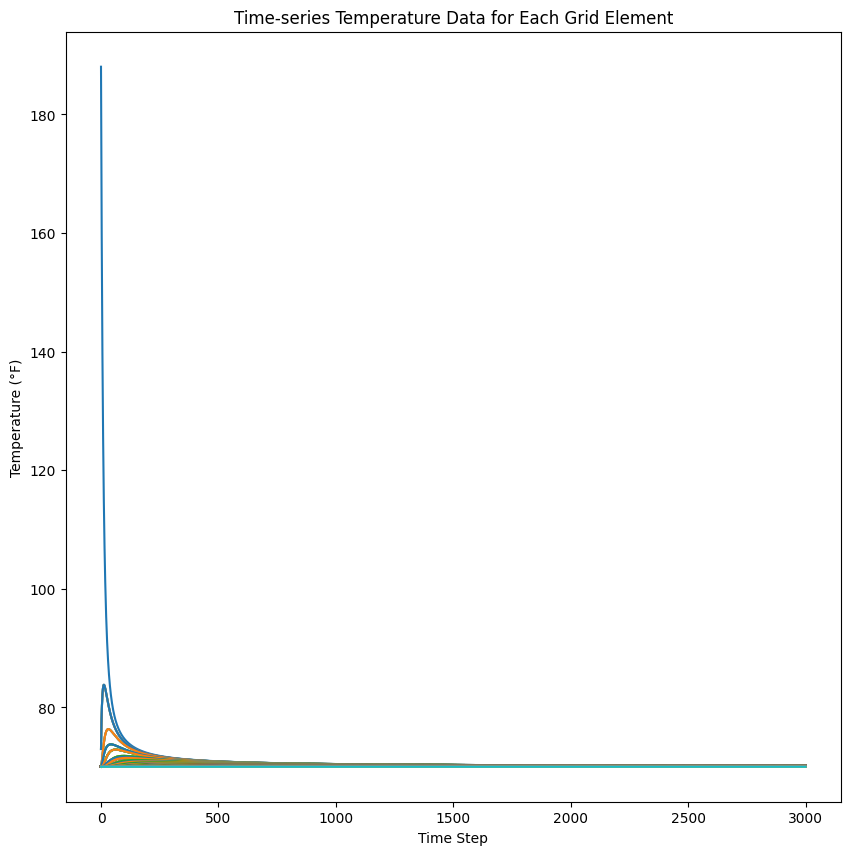

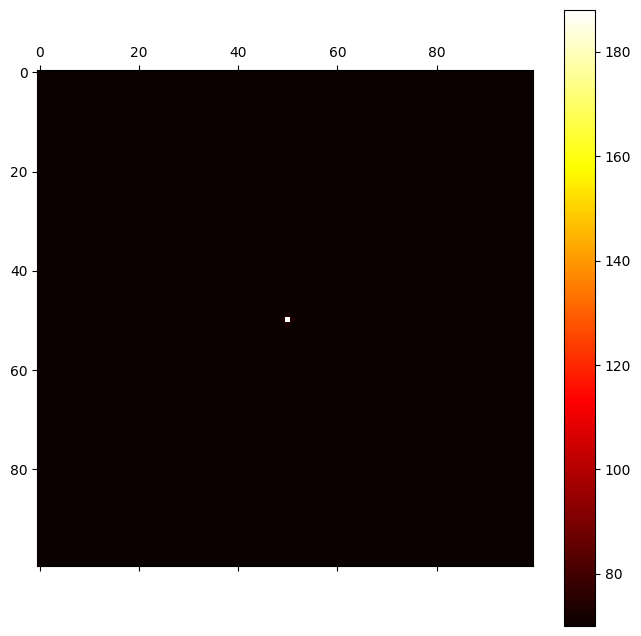

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the temperature data
temperature_data = np.load('temperature_data.npy')

# Get the grid dimensions and number of time steps
n_steps, nx, ny = temperature_data.shape

# Create a time series plot for each element on the grid
plt.figure(figsize=(10, 10))
for i in range(nx):
    for j in range(ny):
        plt.plot(temperature_data[:, i, j], label=f'({i}, {j})')

plt.xlabel('Time Step')
plt.ylabel('Temperature (°F)')
plt.title('Time-series Temperature Data for Each Grid Element')
plt.show()

# Create an animation for the temperature maps of the grid
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(temperature_data[0], cmap='hot')
fig.colorbar(cax)

def update(frame):
    cax.set_data(temperature_data[frame])
    ax.set_title(f'Temperature Map at Time Step {frame}')

ani = FuncAnimation(fig, update, frames=n_steps, repeat=False)
plt.show()


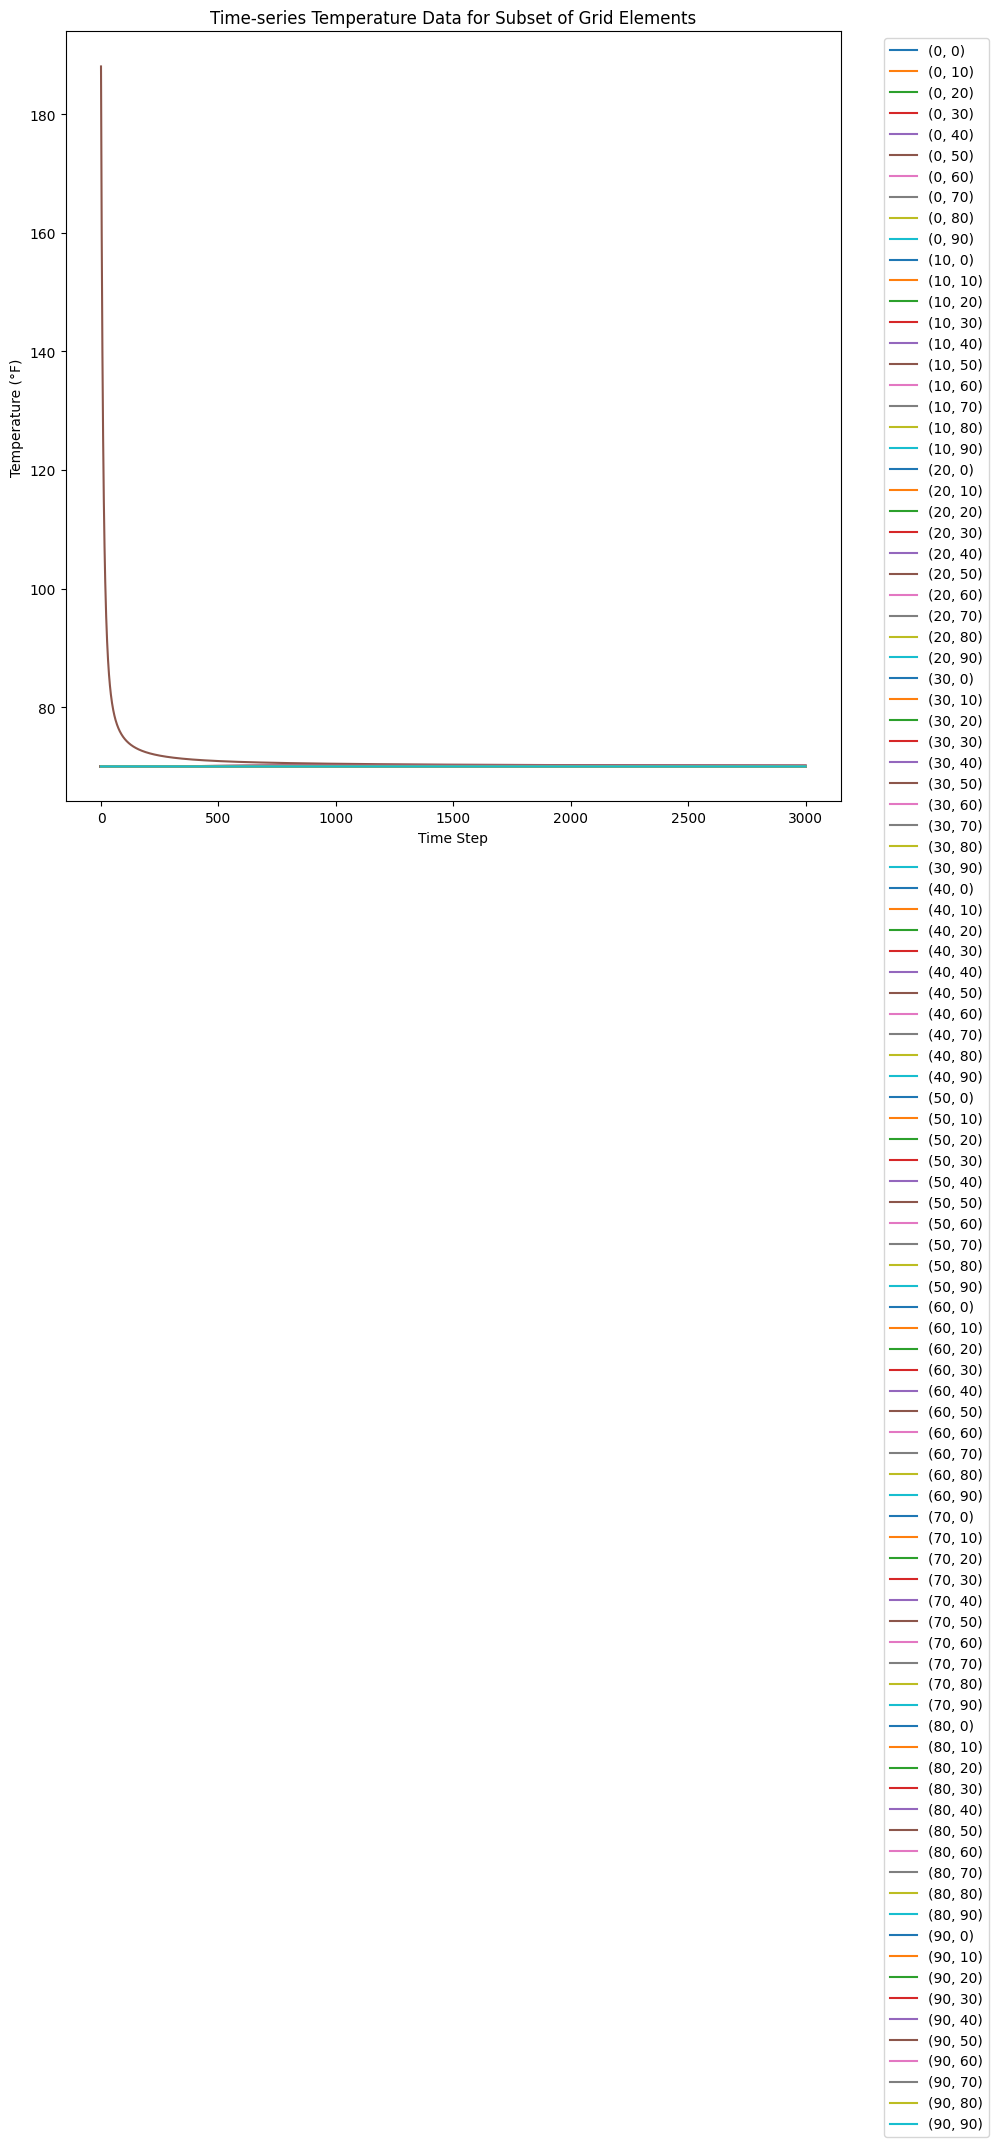

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


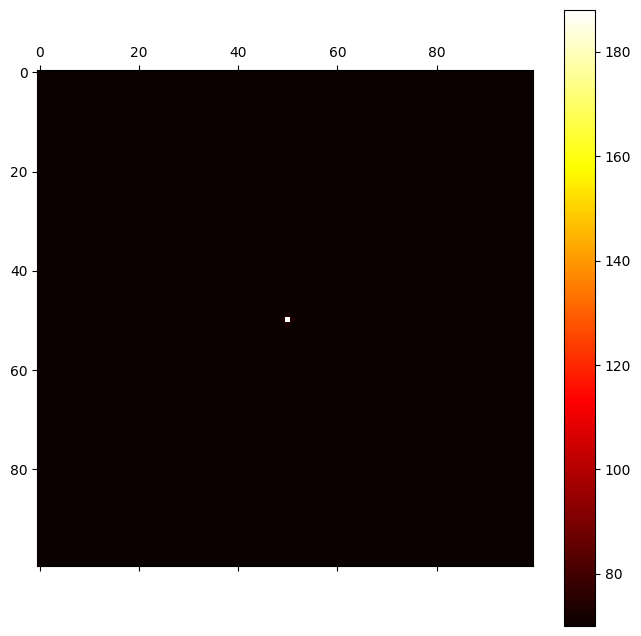

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the temperature data
temperature_data = np.load('temperature_data.npy')

# Get the grid dimensions and number of time steps
n_steps, nx, ny = temperature_data.shape

# Create a time series plot for a subset of elements on the grid
plt.figure(figsize=(10, 10))
for i in range(0, nx, 10):
    for j in range(0, ny, 10):
        plt.plot(temperature_data[:, i, j], label=f'({i}, {j})')

plt.xlabel('Time Step')
plt.ylabel('Temperature (°F)')
plt.title('Time-series Temperature Data for Subset of Grid Elements')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# Create an animation for the temperature maps of the grid
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(temperature_data[0], cmap='hot')
fig.colorbar(cax)

def update(frame):
    cax.set_data(temperature_data[frame])
    ax.set_title(f'Temperature Map at Time Step {frame}')

ani = FuncAnimation(fig, update, frames=n_steps, repeat=False)
plt.show()


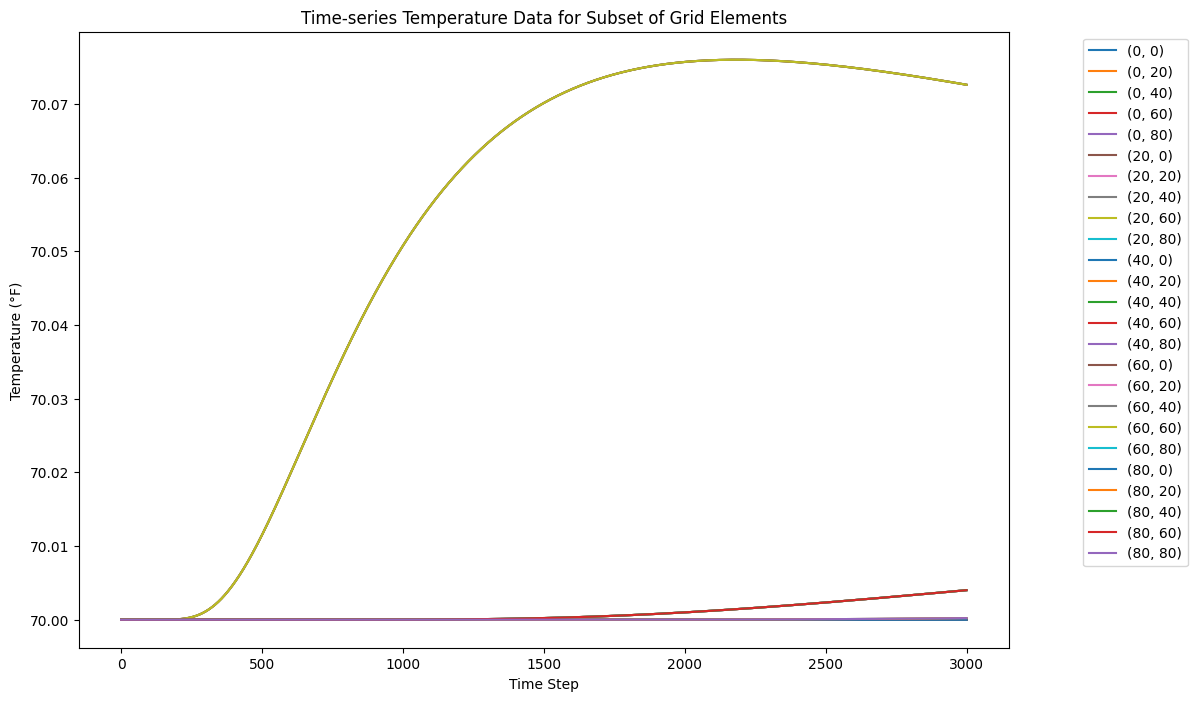

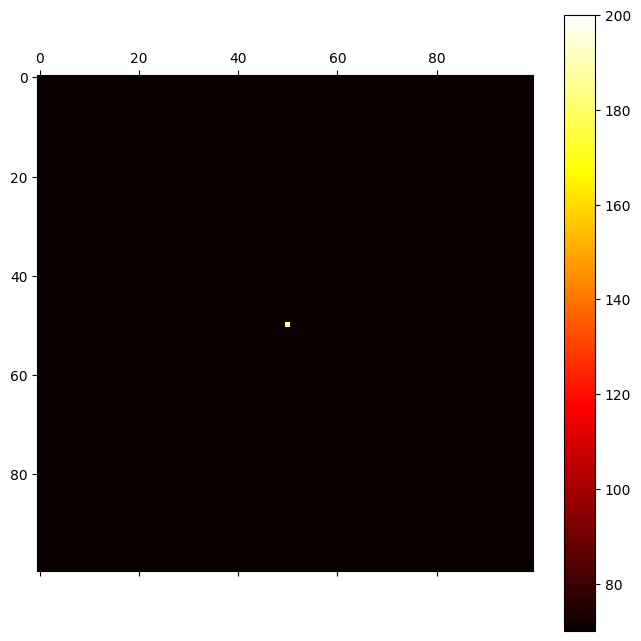

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the temperature data
temperature_data = np.load('/content/temperature_data.npy')

# Get the grid dimensions and number of time steps
n_steps, nx, ny = temperature_data.shape

# Create a time series plot for a subset of elements on the grid
plt.figure(figsize=(12, 8))
for i in range(0, nx, 20):  # every 20th element
    for j in range(0, ny, 20):
        plt.plot(temperature_data[:, i, j], label=f'({i}, {j})')

plt.xlabel('Time Step')
plt.ylabel('Temperature (°F)')
plt.title('Time-series Temperature Data for Subset of Grid Elements')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# Create an animation for the temperature maps of the grid
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(temperature_data[0], cmap='hot', vmin=70, vmax=200)
fig.colorbar(cax)

def update(frame):
    cax.set_data(temperature_data[frame])
    ax.set_title(f'Temperature Map at Time Step {frame}')

ani = FuncAnimation(fig, update, frames=n_steps, repeat=False)
plt.show()


KeyboardInterrupt: 

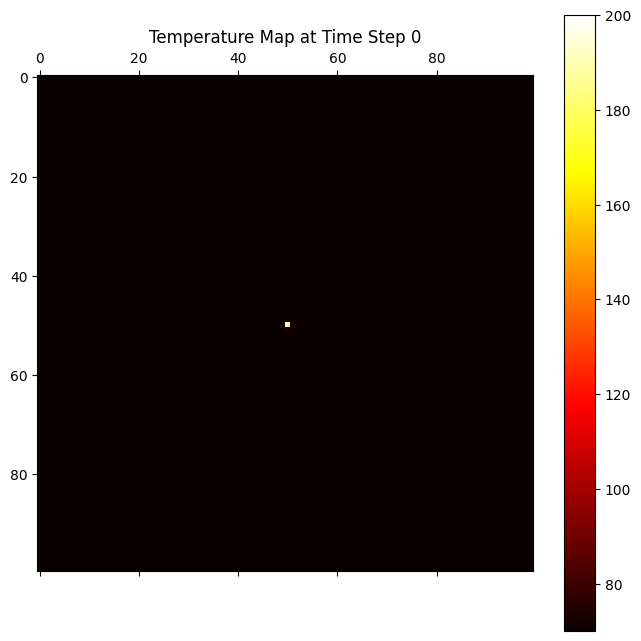

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Load the temperature data
#temperature_data = np.load('/mnt/data/temperature_data.npy')

# Get the grid dimensions and number of time steps
n_steps, nx, ny = temperature_data.shape

# Create an animation for the temperature maps of the grid
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(temperature_data[0], cmap='hot', vmin=70, vmax=200)
fig.colorbar(cax)

def update(frame):
    cax.set_data(temperature_data[frame])
    ax.set_title(f'Temperature Map at Time Step {frame}')

ani = FuncAnimation(fig, update, frames=n_steps, repeat=False)

# Save the animation as a GIF
ani.save('/content/heat_diffusion.gif', writer=PillowWriter(fps=10))

plt.show()


In [ ]:
import numpy as np

# Parameters
alpha = 2.3e-5  # Thermal diffusivity in m^2/s
dx = dy = 0.01  # Grid spacing in meters (1 cm)
dt = 1  # Time step in seconds

# Grid dimensions
nx, ny = 100, 100

# Initialize temperature grid
T = np.full((nx, ny), 70.0)  # Ambient temperature in Fahrenheit
T[nx//2, ny//2] = 200.0  # Initial temperature at the center

# Convert time duration to seconds
time_duration = 2 * 60  # 2 minutes in seconds
n_steps = int(time_duration / dt)

# Function to apply the heat equation
def apply_heat_equation(T, alpha, dx, dy, dt):
    T_new = T.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            T_new[i, j] = T[i, j] + alpha * dt * (
                (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx**2 +
                (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dy**2
            )
    return T_new

# Simulate heat diffusion
temperature_data = np.zeros((n_steps, nx, ny))

for step in range(n_steps):
    T = apply_heat_equation(T, alpha, dx, dy, dt)
    temperature_data[step] = T

# Save the data to a numpy file
np.save('/content/temperature_data_2_minutes.npy', temperature_data)


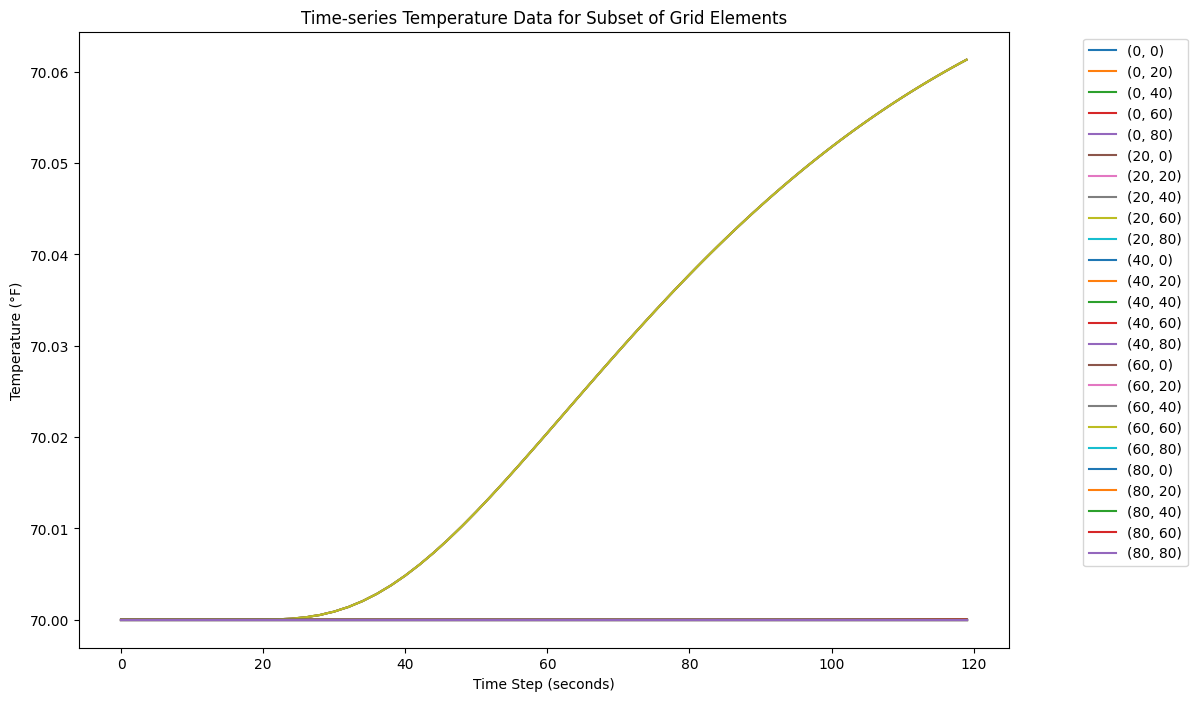

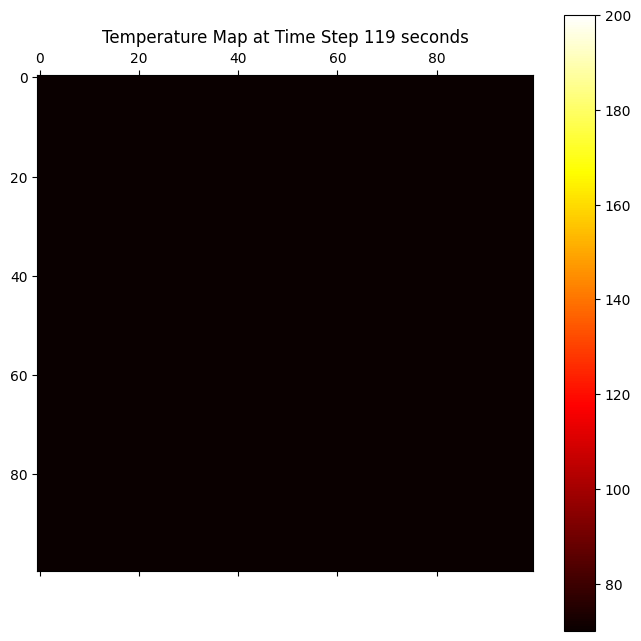

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Load the temperature data
temperature_data = np.load('/content/temperature_data_2_minutes.npy')

# Get the grid dimensions and number of time steps
n_steps, nx, ny = temperature_data.shape

# Create a time series plot for a subset of elements on the grid
plt.figure(figsize=(12, 8))
for i in range(0, nx, 20):  # every 20th element
    for j in range(0, ny, 20):
        plt.plot(temperature_data[:, i, j], label=f'({i}, {j})')

plt.xlabel('Time Step (seconds)')
plt.ylabel('Temperature (°F)')
plt.title('Time-series Temperature Data for Subset of Grid Elements')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# Create an animation for the temperature maps of the grid
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(temperature_data[0], cmap='hot', vmin=70, vmax=200)
fig.colorbar(cax)

def update(frame):
    cax.set_data(temperature_data[frame])
    ax.set_title(f'Temperature Map at Time Step {frame} seconds')

ani = FuncAnimation(fig, update, frames=n_steps, repeat=False)

# Save the animation as a GIF
ani.save('/content/heat_diffusion_2_minutes.gif', writer=PillowWriter(fps=10))

plt.show()


In [ ]:
import numpy as np

# Parameters
alpha = 2.3e-5  # Thermal diffusivity in m^2/s
dx = dy = 0.01  # Grid spacing in meters (1 cm)
dt = 1  # Time step in seconds

# Grid dimensions
nx, ny = 100, 100

# Initialize temperature grid
T = np.full((nx, ny), 70.0)  # Ambient temperature in Fahrenheit
T[nx//2, ny//2] = 200.0  # Initial temperature at the center

# Convert time duration to seconds
time_duration = 2 * 60  # 2 minutes in seconds
n_steps = int(time_duration / dt)

# Function to apply the heat equation
def apply_heat_equation(T, alpha, dx, dy, dt):
    T_new = T.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            T_new[i, j] = T[i, j] + alpha * dt * (
                (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx**2 +
                (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dy**2
            )
    return T_new

# Simulate heat diffusion
temperature_data = np.zeros((n_steps, nx, ny))

for step in range(n_steps):
    T = apply_heat_equation(T, alpha, dx, dy, dt)
    temperature_data[step] = T

# Save the data to a numpy file
np.save('/content/data/temperature_data_2_minutes.npy', temperature_data)


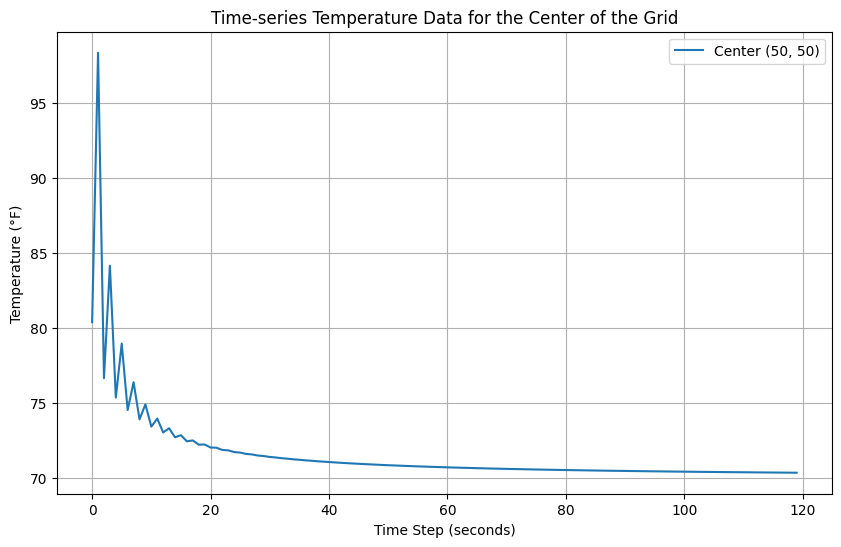

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the temperature data
temperature_data = np.load('/content/data/temperature_data_2_minutes.npy')

# Get the grid dimensions and number of time steps
n_steps, nx, ny = temperature_data.shape

# Center of the grid
center_x, center_y = nx // 2, ny // 2

# Extract the time-series data for the center of the grid
center_temp_data = temperature_data[:, center_x, center_y]

# Plot the time-series data for the center of the grid
plt.figure(figsize=(10, 6))
plt.plot(np.arange(n_steps), center_temp_data, label=f'Center ({center_x}, {center_y})')
plt.xlabel('Time Step (seconds)')
plt.ylabel('Temperature (°F)')
plt.title('Time-series Temperature Data for the Center of the Grid')
plt.legend()
plt.grid(True)
plt.show()


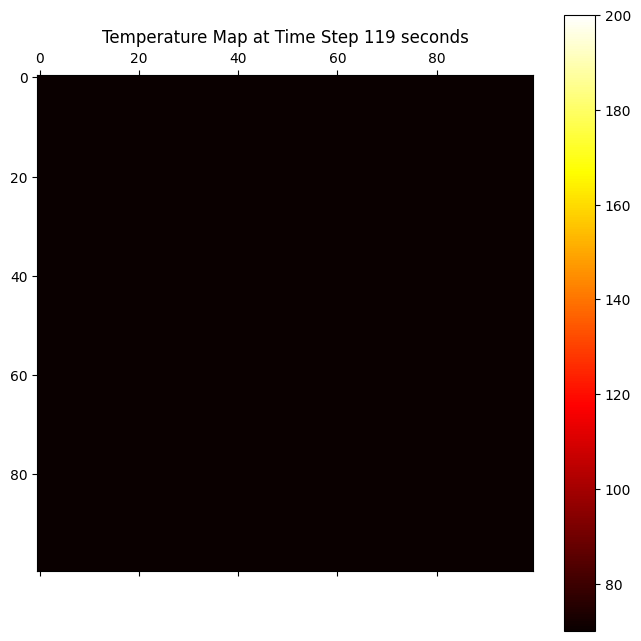

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Load the temperature data
temperature_data = np.load('/content/data/temperature_data_2_minutes.npy')

# Get the grid dimensions and number of time steps
n_steps, nx, ny = temperature_data.shape

# Create an animation for the temperature maps of the grid
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(temperature_data[0], cmap='hot', vmin=70, vmax=200)
fig.colorbar(cax)

def update(frame):
    cax.set_data(temperature_data[frame])
    ax.set_title(f'Temperature Map at Time Step {frame} seconds')

ani = FuncAnimation(fig, update, frames=n_steps, repeat=False)

# Save the animation as a GIF
ani.save('/content/data/heat_diffusion_2_minutes.gif', writer=PillowWriter(fps=10))

plt.show()


In [ ]:
import numpy as np

# Parameters
alpha = 2.3e-5  # Thermal diffusivity in m^2/s
dx = dy = 0.01  # Grid spacing in meters (1 cm)
dt = 1  # Time step in seconds

# Grid dimensions
nx, ny = 100, 100

# Initialize temperature grid
T = np.full((nx, ny), 70.0)  # Ambient temperature in Fahrenheit

# Center of the grid
center_x, center_y = nx // 2, ny // 2
T[center_x, center_y] = 200.0  # Initial temperature at the center

# Convert time duration to seconds
time_duration = 2 * 60  # 2 minutes in seconds
n_steps = int(time_duration / dt)

# Function to apply the heat equation
def apply_heat_equation(T, alpha, dx, dy, dt, center_x, center_y):
    T_new = T.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            T_new[i, j] = T[i, j] + alpha * dt * (
                (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx**2 +
                (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dy**2
            )
    # Keep the center continuously heated
    T_new[center_x, center_y] = 200.0
    return T_new

# Simulate heat diffusion
temperature_data = np.zeros((n_steps, nx, ny))

for step in range(n_steps):
    T = apply_heat_equation(T, alpha, dx, dy, dt, center_x, center_y)
    temperature_data[step] = T

# Save the data to a numpy file
np.save('/content/good_data/temperature_data_2_minutes_continuous_heat.npy', temperature_data)


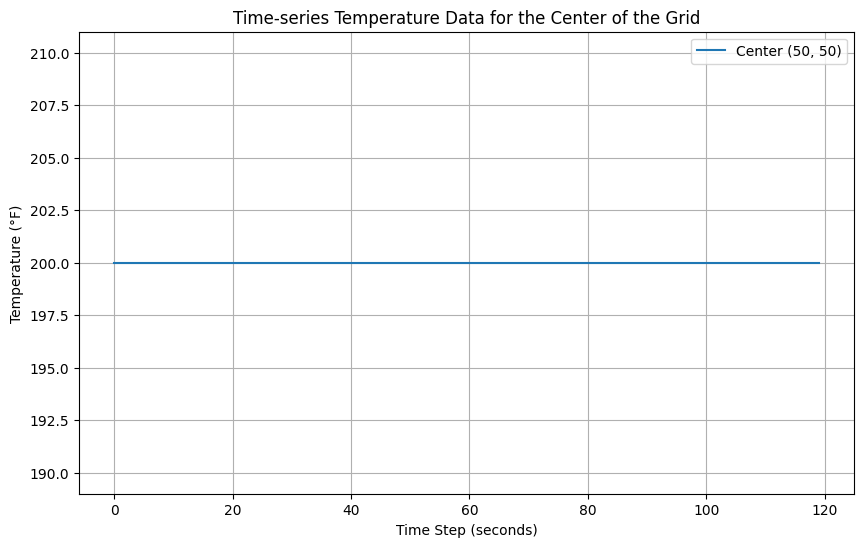

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the temperature data
temperature_data = np.load('/content/good_data/temperature_data_2_minutes_continuous_heat.npy')

# Get the grid dimensions and number of time steps
n_steps, nx, ny = temperature_data.shape

# Center of the grid
center_x, center_y = nx // 2, ny // 2

# Extract the time-series data for the center of the grid
center_temp_data = temperature_data[:, center_x, center_y]

# Plot the time-series data for the center of the grid
plt.figure(figsize=(10, 6))
plt.plot(np.arange(n_steps), center_temp_data, label=f'Center ({center_x}, {center_y})')
plt.xlabel('Time Step (seconds)')
plt.ylabel('Temperature (°F)')
plt.title('Time-series Temperature Data for the Center of the Grid')
plt.legend()
plt.grid(True)
plt.show()


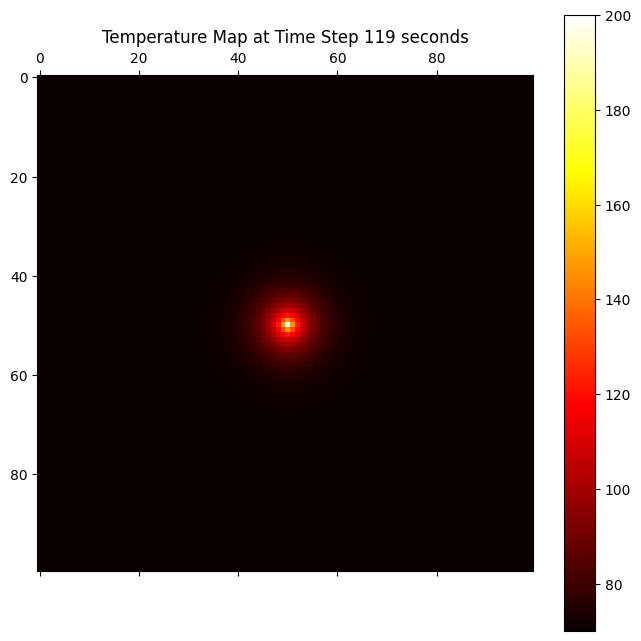

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Load the temperature data
temperature_data = np.load('/content/good_data/temperature_data_2_minutes_continuous_heat.npy')

# Get the grid dimensions and number of time steps
n_steps, nx, ny = temperature_data.shape

# Create an animation for the temperature maps of the grid
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(temperature_data[0], cmap='hot', vmin=70, vmax=200)
fig.colorbar(cax)

def update(frame):
    cax.set_data(temperature_data[frame])
    ax.set_title(f'Temperature Map at Time Step {frame} seconds')

ani = FuncAnimation(fig, update, frames=n_steps, repeat=False)

# Save the animation as a GIF
ani.save('/content/good_data/heat_diffusion_2_minutes_continuous_heat.gif', writer=PillowWriter(fps=10))

plt.show()


In [ ]:
import numpy as np

# Parameters
alpha = 2.3e-5  # Thermal diffusivity in m^2/s
dx = dy = 0.01  # Grid spacing in meters (1 cm)
dt = 1  # Time step in seconds

# Grid dimensions
nx, ny = 10, 10  # Adjusted to a smaller grid for practical visualization

# Initialize temperature grid
T = np.full((nx, ny), 70.0)  # Ambient temperature in Fahrenheit

# Center of the grid
center_x, center_y = nx // 2, ny // 2
T[center_x, center_y] = 200.0  # Initial temperature at the center

# Convert time duration to seconds
time_duration = 5 * 60  # 5 minutes in seconds
n_steps = int(time_duration / dt)

# Function to apply the heat equation
def apply_heat_equation(T, alpha, dx, dy, dt, center_x, center_y):
    T_new = T.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            T_new[i, j] = T[i, j] + alpha * dt * (
                (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx**2 +
                (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dy**2
            )
    # Keep the center continuously heated
    T_new[center_x, center_y] = 200.0
    return T_new

# Simulate heat diffusion
temperature_data = np.zeros((n_steps, nx, ny))

for step in range(n_steps):
    T = apply_heat_equation(T, alpha, dx, dy, dt, center_x, center_y)
    temperature_data[step] = T

# Save the data to a numpy file
np.save('/content/new_data/temperature_data_2_minutes_continuous_heat_small.npy', temperature_data)


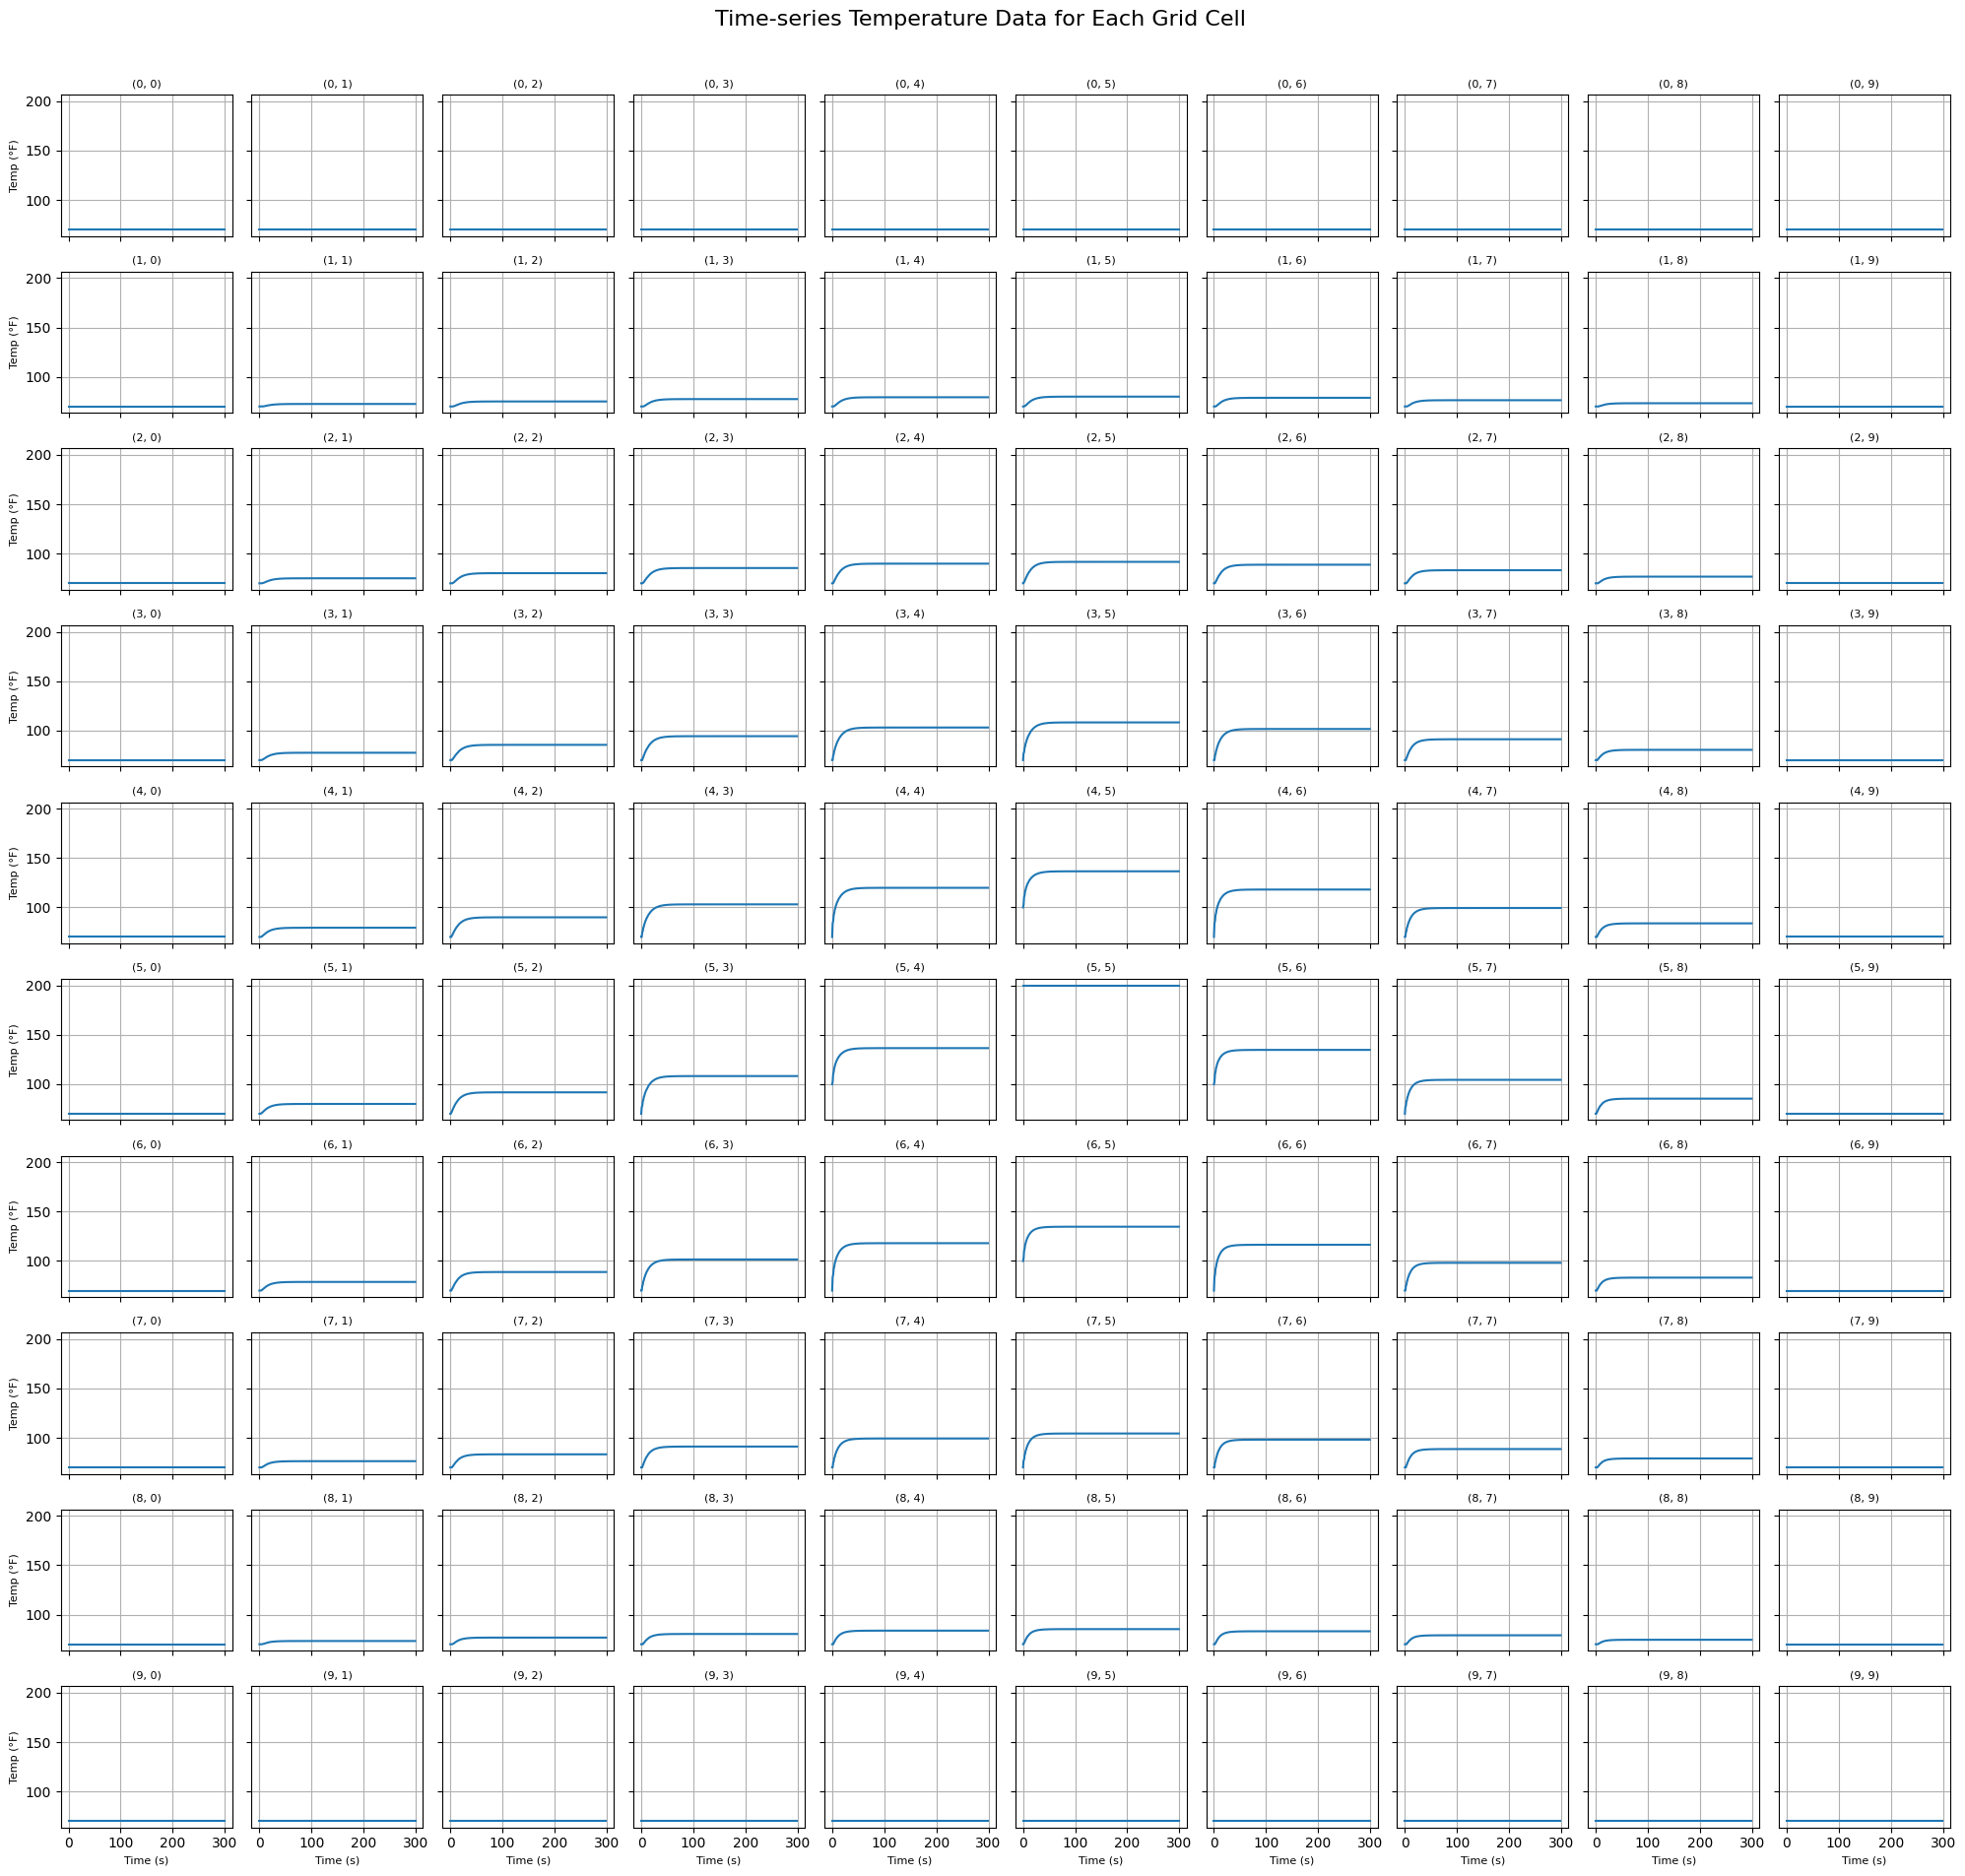

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the temperature data
temperature_data = np.load('/content/new_data/temperature_data_2_minutes_continuous_heat_small.npy')

# Get the grid dimensions and number of time steps
n_steps, nx, ny = temperature_data.shape

# Create subplots for each grid cell
fig, axes = plt.subplots(nx, ny, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle('Time-series Temperature Data for Each Grid Cell', fontsize=16)

for i in range(nx):
    for j in range(ny):
        axes[i, j].plot(np.arange(n_steps), temperature_data[:, i, j])
        axes[i, j].set_title(f'({i}, {j})', fontsize=8)
        axes[i, j].grid(True)
        if i == nx - 1:
            axes[i, j].set_xlabel('Time (s)', fontsize=8)
        if j == 0:
            axes[i, j].set_ylabel('Temp (°F)', fontsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


In [ ]:
import numpy as np

# Parameters
alpha = 2.3e-5  # Thermal diffusivity in m^2/s
dx = dy = 0.01  # Grid spacing in meters (1 cm)
dt = 1  # Time step in seconds

# Grid dimensions
nx, ny = 10, 10  # Adjusted to a smaller grid for practical visualization

# Initialize temperature grid
T = np.full((nx, ny), 70.0)  # Ambient temperature in Fahrenheit

# Center of the grid
center_x, center_y = nx // 2, ny // 2
T[center_x, center_y] = 200.0  # Initial temperature at the center

# Convert time duration to seconds
time_duration = 2 * 60  # 2 minutes in seconds
n_steps = int(time_duration / dt)

# Function to apply the heat equation
def apply_heat_equation(T, alpha, dx, dy, dt, center_x, center_y):
    T_new = T.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            T_new[i, j] = T[i, j] + alpha * dt * (
                (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx**2 +
                (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dy**2
            )
    # Keep the center continuously heated
    T_new[center_x, center_y] = 200.0
    return T_new

# Simulate heat diffusion
temperature_data = np.zeros((n_steps, nx, ny))

for step in range(n_steps):
    T = apply_heat_equation(T, alpha, dx, dy, dt, center_x, center_y)
    temperature_data[step] = T

# Save the data to a numpy file
np.save('/content/data/temperature_data_2_minutes_continuous_heat_small.npy', temperature_data)


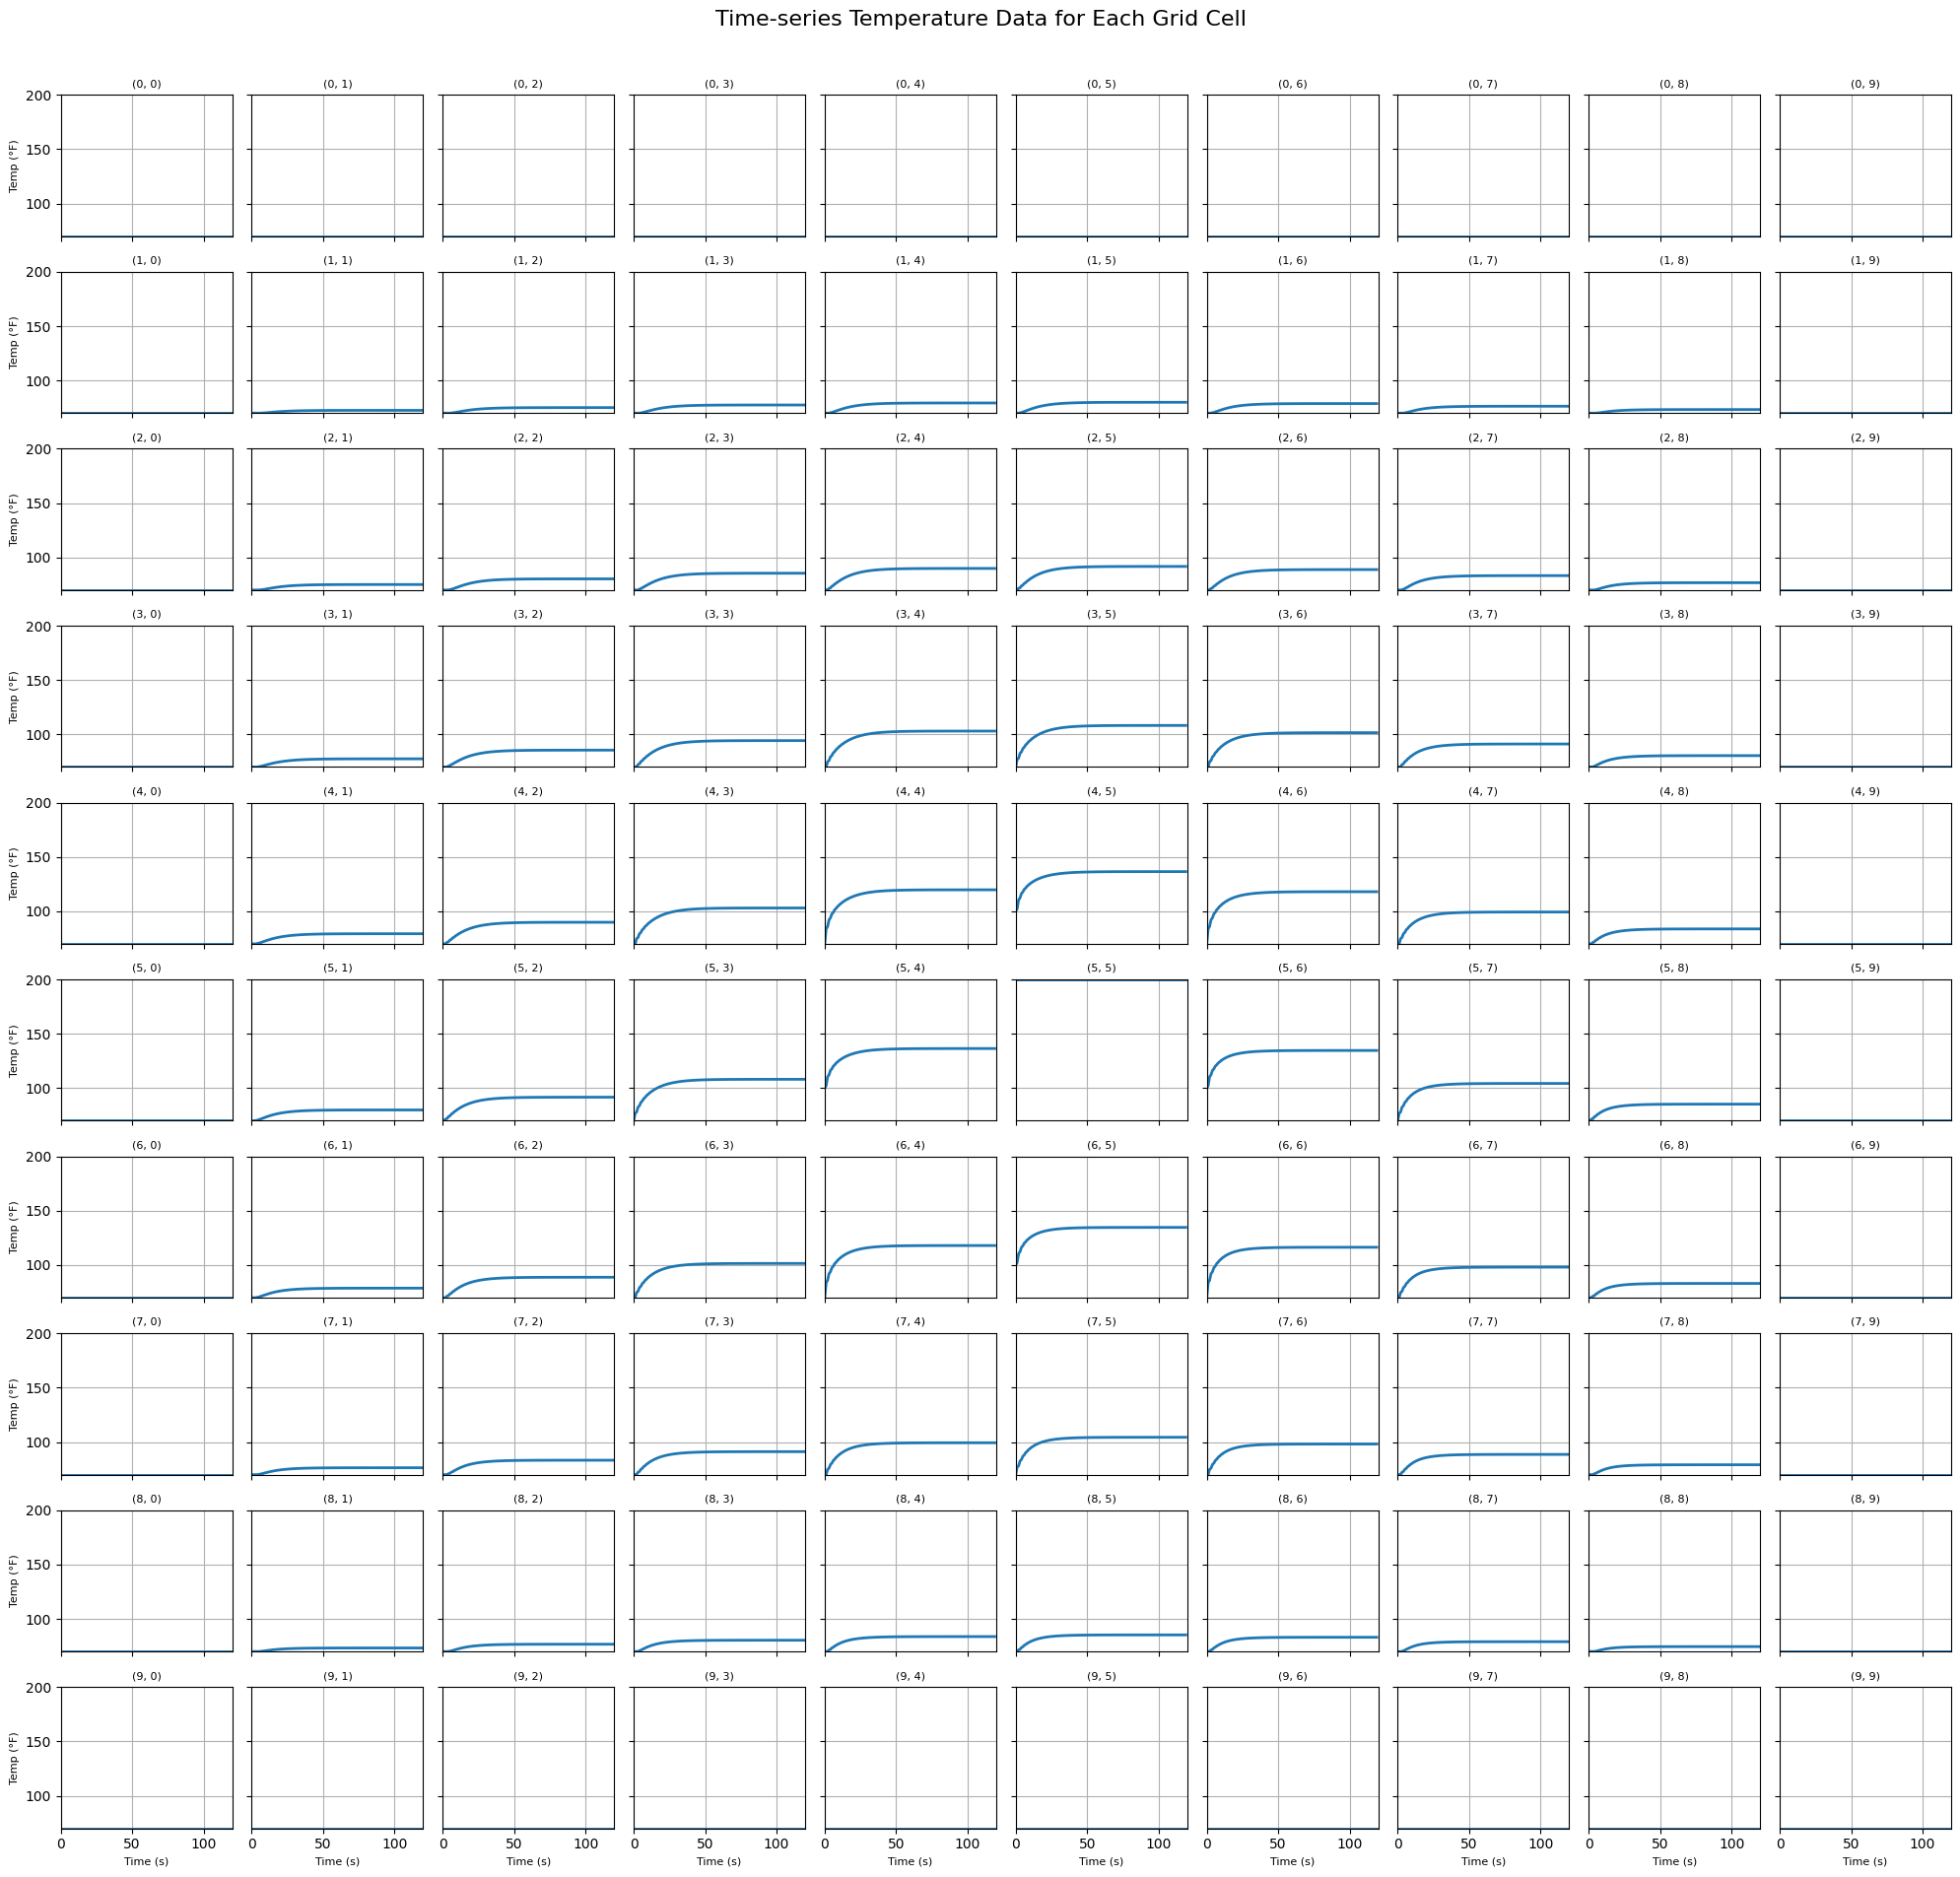

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Load the temperature data
temperature_data = np.load('/content/data/temperature_data_2_minutes_continuous_heat_small.npy')

# Get the grid dimensions and number of time steps
n_steps, nx, ny = temperature_data.shape

# Create subplots for each grid cell
fig, axes = plt.subplots(nx, ny, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle('Time-series Temperature Data for Each Grid Cell', fontsize=16)

# Initialize the plots
lines = []
for i in range(nx):
    for j in range(ny):
        line, = axes[i, j].plot([], [], lw=2)
        axes[i, j].set_xlim(0, n_steps)
        axes[i, j].set_ylim(70, 200)
        axes[i, j].set_title(f'({i}, {j})', fontsize=8)
        axes[i, j].grid(True)
        if i == nx - 1:
            axes[i, j].set_xlabel('Time (s)', fontsize=8)
        if j == 0:
            axes[i, j].set_ylabel('Temp (°F)', fontsize=8)
        lines.append(line)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])

# Animation update function
def update(frame):
    for k, line in enumerate(lines):
        i, j = divmod(k, ny)
        line.set_data(np.arange(frame+1), temperature_data[:frame+1, i, j])
    return lines

ani = FuncAnimation(fig, update, frames=n_steps, blit=True, repeat=False)

# Save the animation as a GIF
ani.save('/content/data/heat_diffusion_2_minutes_continuous_heat_small.gif', writer=PillowWriter(fps=10))

plt.show()
